In [1]:
# test_evaluate_brisque_scores
# test_brisque_scores takes hours to run...this script evaluates the results

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('brisque_scores.csv',header=None,sep=',')
df.columns = ['fpath','bs']

In [3]:
df2 = pd.read_csv('brisque_scores_small.csv',header=None,sep=',')
df2.columns = ['fpath','bs']
df['bs_s']=df2['bs']

df3 = pd.read_csv('sharpness_scores_small.csv',header=None,sep=',')
df3.columns = ['fpath','s','ss','c','cs']
df['s']=df3['s']
df['ss']=df3['ss']
df['c']=df3['c']
df['cs']=df3['cs']

df.describe()

,bs,bs_s,s,ss,c,cs
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,57.186202,32.325765,0.000380,0.000432,0.035913,0.023011
std,14.323033,18.396434,0.000510,0.001180,0.066005,0.063071
min,35.264000,6.118000,0.000045,0.000000,0.004810,0.000000
25%,46.379000,20.144250,0.000150,0.000000,0.009570,0.000000
50%,52.651000,25.435500,0.000189,0.000000,0.010820,0.000000
75%,64.844250,40.339250,0.000259,0.000000,0.012711,0.000000
max,105.052000,94.781000,0.003349,0.005742,0.308768,0.297419


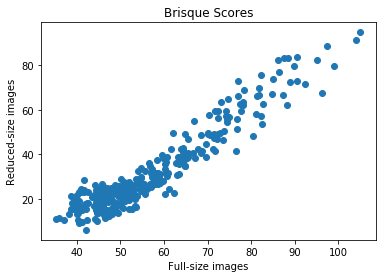

In [4]:
plt.scatter(df['bs'].values,df['bs_s'].values)
plt.xlabel('Full-size images')
plt.ylabel('Reduced-size images')
_ = plt.title('Brisque Scores')

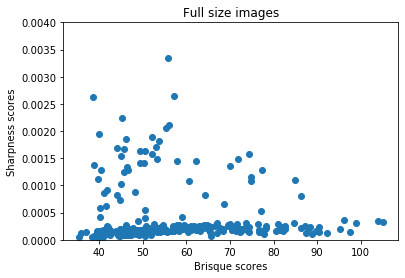

In [5]:
plt.scatter(df['bs'].values,df['s'].values)
plt.xlabel('Brisque scores')
plt.ylabel('Sharpness scores')
plt.ylim((0.,.004))
_ = plt.title('Full size images')

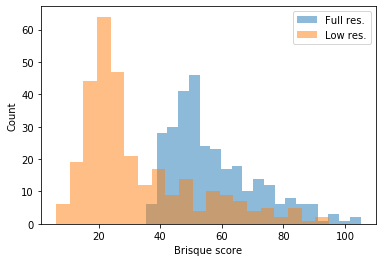

In [6]:
plt.hist(df['bs'].values,bins=20,alpha=.5,label='Full res.')
plt.hist(df['bs_s'].values,bins=20,alpha=.5,label='Low res.')
plt.xlabel('Brisque score')
plt.ylabel('Count')
plt.legend()

In [7]:
dfr = df.sample(16)
dfr.describe()

,bs,bs_s,s,ss,c,cs
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,56.865562,32.043750,0.000189,0.000085,0.017316,0.007714
std,17.629732,23.901202,0.000174,0.000340,0.032240,0.030855
min,38.747000,13.275000,0.000053,0.000000,0.005470,0.000000
25%,45.353000,15.508250,0.000117,0.000000,0.008337,0.000000
50%,49.962500,23.354500,0.000162,0.000000,0.009981,0.000000
75%,62.785000,31.280750,0.000196,0.000000,0.011044,0.000000
max,90.377000,83.503000,0.000805,0.001360,0.137948,0.123420


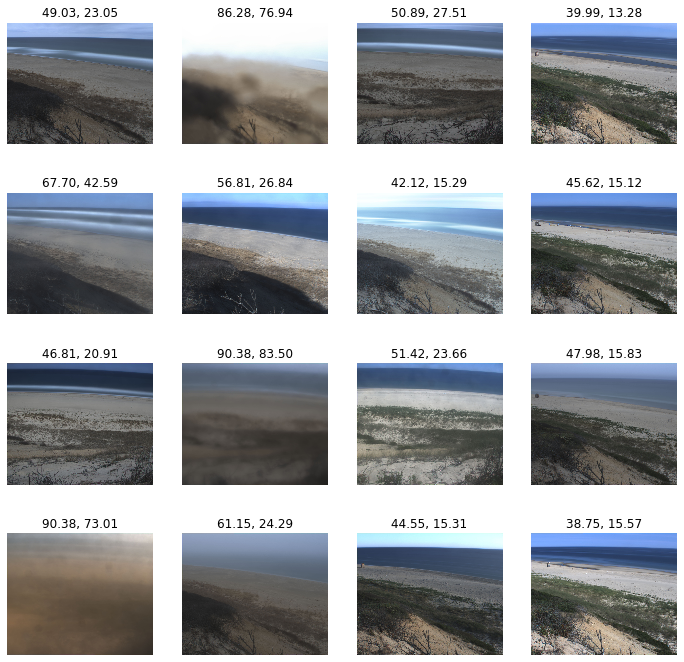

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(12,12))
idx = 1
for index, row in dfr.iterrows():
    #print(row['fpath'],row['bs'])
    img = plt.imread(row['fpath'])
    plt.subplot(4,4,idx)
    plt.imshow(img)
    plt.axis('off')
    plt.title('{:.2f}, {:.2f}'.format(row['bs'],row['bs_s']))
    idx = idx+1
    
plt.show()
plt.savefig('brisque_images.pdf')

In [9]:
df.loc[df['bs'] == df['bs'].min()]['fpath']

152    C:\crs\proj\2019_CACO_CoastCam\random_obliques...
Name: fpath, dtype: object

In [10]:
df['fpath'][152]

'C:\\crs\\proj\\2019_CACO_CoastCam\\random_obliques\\1594724401.c1.timex.jpg'

In [11]:
df.loc[df['bs'] == df['bs'].max()]['fpath']

208    C:\crs\proj\2019_CACO_CoastCam\random_obliques...
Name: fpath, dtype: object

In [12]:
df['fpath'][208]

'C:\\crs\\proj\\2019_CACO_CoastCam\\random_obliques\\1600606801.c1.timex.jpg'

In [13]:
df.loc[df['bs'] == df['bs'].quantile(0.25)]['fpath']

Series([], Name: fpath, dtype: object)